In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

In [3]:
import pandas as pd
import numpy as np

In [4]:
data=fetch_ucirepo(id=544)

In [5]:
df=pd.DataFrame(data.data.features,data.data.feature_names)
df['NObeyesdad'] = data.data.targets 
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [9]:
X = df.drop('NObeyesdad', axis=1)
Y = df['NObeyesdad']

In [10]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

In [11]:
lbl=LabelEncoder()
std=StandardScaler()

In [12]:
y_encoded=lbl.fit_transform(Y)

In [13]:
y_encoded

array([1, 1, 1, ..., 4, 4, 4], shape=(2111,))

In [14]:
categorical_columns = X.select_dtypes(include=['object']).columns

In [15]:
categorical_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [16]:
for i in categorical_columns:
    df[i]=lbl.fit_transform(df[i])

In [17]:
df[categorical_columns]

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0,1,0,2,0,0,3,3
1,0,1,0,2,1,1,2,3
2,1,1,0,2,0,0,1,3
3,1,0,0,2,0,0,1,4
4,1,0,0,2,0,0,2,3
...,...,...,...,...,...,...,...,...
2106,0,1,1,2,0,0,2,3
2107,0,1,1,2,0,0,2,3
2108,0,1,1,2,0,0,2,3
2109,0,1,1,2,0,0,2,3


In [18]:
X = df.drop('NObeyesdad', axis=1)
Y = df['NObeyesdad']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
X_train.shape,X_test.shape

((1688, 16), (423, 16))

In [22]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
162,0,21.000000,1.630000,60.000000,1,1,3.000000,3.000000,0,1,2.000000,0,2.000000,0.000000,2,3
2001,0,20.924956,1.752531,133.618706,1,1,3.000000,3.000000,2,0,2.887659,0,1.480919,0.779641,2,3
1435,0,22.899740,1.661715,82.595793,1,1,1.203754,1.355354,2,0,2.765593,0,0.128342,1.659476,2,3
649,0,21.837996,1.588046,44.236067,0,0,3.000000,1.696080,1,0,2.550307,0,1.098862,0.000000,3,3
1280,1,25.994746,1.811602,106.042142,1,1,3.000000,3.000000,2,0,2.858171,0,1.813318,0.680215,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,32.290160,1.754956,120.098812,1,1,2.967300,3.000000,2,0,2.530035,0,0.955317,1.339232,2,0
1095,1,23.000000,1.718981,81.669950,1,1,2.000000,1.729553,2,0,1.400247,0,0.887923,1.011983,2,3
1130,0,22.989846,1.650000,80.000000,1,1,2.000000,3.000000,2,0,2.000000,0,0.146919,2.000000,3,3
1294,0,23.000000,1.628168,84.497980,1,1,2.058687,2.962004,2,0,2.010596,0,0.851059,0.630866,3,3


In [23]:
X_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
544,0,20.406871,1.755978,53.699561,1,1,2.000000,3.891994,1,0,1.863930,0,2.870127,2.000000,3,3
1987,0,26.000000,1.624950,111.004920,1,1,3.000000,3.000000,2,0,2.704315,0,0.000000,0.322666,2,3
420,1,18.000000,1.850000,60.000000,1,1,3.000000,4.000000,2,0,2.000000,1,2.000000,0.000000,2,0
527,0,21.000000,1.520000,42.000000,0,1,3.000000,1.000000,1,0,1.000000,0,0.000000,0.000000,2,3
196,1,22.000000,1.750000,74.000000,1,0,2.000000,3.000000,2,0,2.000000,0,1.000000,2.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1,19.000000,1.800000,87.000000,1,1,2.000000,4.000000,2,0,2.000000,0,2.000000,1.000000,2,3
1793,1,30.715160,1.650189,101.141277,1,1,2.913452,2.269799,2,0,1.000000,0,1.889937,0.378818,3,3
73,1,19.000000,1.850000,65.000000,1,0,2.000000,3.000000,2,0,3.000000,0,2.000000,1.000000,2,1
1711,1,28.986237,1.758618,113.501549,1,1,2.320201,3.000000,2,0,2.164784,0,0.000000,1.465479,2,0


In [24]:
#filter method
from sklearn.feature_selection import SelectKBest,chi2,_mutual_info

In [25]:
sf=SelectKBest(chi2, k=10)

In [26]:
X_train_selected=sf.fit_transform(X_train,Y_train)
X_test_selected=sf.transform(X_test)

In [27]:
selected_features=X.columns[sf.get_support()]

In [28]:
selected_features

Index(['Gender', 'Age', 'Weight', 'family_history_with_overweight', 'FCVC',
       'NCP', 'CAEC', 'SCC', 'FAF', 'MTRANS'],
      dtype='object')

In [29]:
#wrapper method
!pip install mlxtend

In [30]:
from sklearn.feature_selection import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *

In [31]:
log_reg=LogisticRegression(
    random_state=42,
    solver='liblinear',
    max_iter=100
)

In [32]:
sfs=SequentialFeatureSelector(
    log_reg,
    n_features_to_select='auto',
    direction='forward',
    scoring='accuracy',
    cv=5)

In [33]:
sfs.fit(X_train,Y_train)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=42,
                                                       solver='liblinear'),
                          scoring='accuracy')

In [34]:
selected_f_names=sfs.get_feature_names_out()

In [35]:
selected_f_names

array(['Gender', 'Height', 'Weight', 'family_history_with_overweight',
       'CAEC', 'SMOKE', 'CH2O', 'FAF'], dtype=object)

In [36]:
#ensemble 
from sklearn.ensemble import *

In [37]:
rf=RandomForestClassifier(random_state=42)

In [38]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [39]:
rf_features=rf.feature_importances_
feature_names=X_train.columns.tolist()

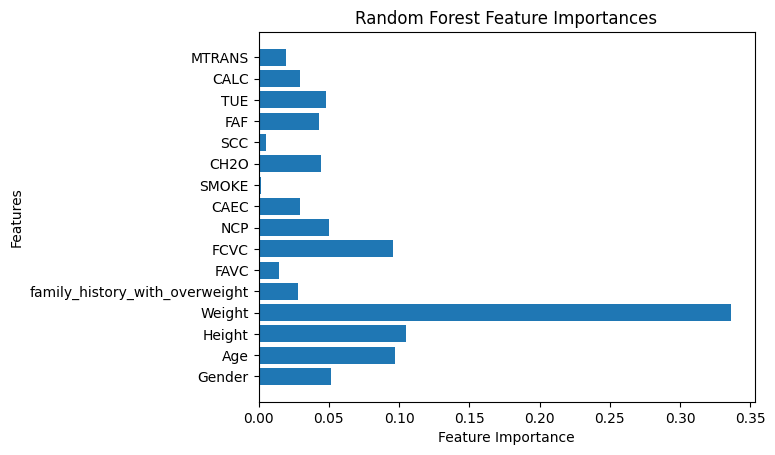

In [40]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.barh(feature_names, rf_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.show()


In [41]:
# log reg
log_reg.fit(X_train,Y_train)
log_reg_y_pred=log_reg.predict(X_test)

In [42]:
accuracy_log_reg=accuracy_score(Y_test,log_reg_y_pred)

In [43]:
accuracy_log_reg

0.7139479905437353

In [44]:
print(classification_report(Y_test,log_reg_y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.95      0.88        56
      Normal_Weight       0.79      0.35      0.49        62
     Obesity_Type_I       0.65      0.58      0.61        78
    Obesity_Type_II       0.75      0.98      0.85        58
   Obesity_Type_III       0.93      1.00      0.96        63
 Overweight_Level_I       0.61      0.62      0.62        56
Overweight_Level_II       0.44      0.54      0.49        50

           accuracy                           0.71       423
          macro avg       0.71      0.72      0.70       423
       weighted avg       0.72      0.71      0.70       423



In [45]:
# svm
from sklearn.svm import SVC

In [46]:
svm=SVC(
    C=1.0,
    kernel='linear',
    shrinking=True
)

In [47]:
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [48]:
svc_pred=svm.predict(X_test)

In [49]:
accuracy_score_svm=accuracy_score(Y_test,svc_pred)

In [50]:
accuracy_score_svm

0.8865248226950354

In [51]:
print(classification_report(Y_test,svc_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      1.00      0.92        56
      Normal_Weight       0.93      0.65      0.76        62
     Obesity_Type_I       0.92      0.94      0.93        78
    Obesity_Type_II       0.94      1.00      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.75      0.88      0.81        56
Overweight_Level_II       0.80      0.72      0.76        50

           accuracy                           0.89       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.89      0.89      0.88       423



In [52]:
#feature selection
#filter
filter_df=df[['Gender', 'Age', 'Weight', 'family_history_with_overweight', 'FCVC',
       'NCP', 'CAEC', 'SCC', 'FAF', 'MTRANS']]
filter_df

,Gender,Age,Weight,family_history_with_overweight,FCVC,NCP,CAEC,SCC,FAF,MTRANS
0,0,21.000000,64.000000,1,2.0,3.0,2,0,0.000000,3
1,0,21.000000,56.000000,1,3.0,3.0,2,1,3.000000,3
2,1,23.000000,77.000000,1,2.0,3.0,2,0,2.000000,3
3,1,27.000000,87.000000,0,3.0,3.0,2,0,2.000000,4
4,1,22.000000,89.800000,0,2.0,1.0,2,0,0.000000,3
...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,131.408528,1,3.0,3.0,2,0,1.676269,3
2107,0,21.982942,133.742943,1,3.0,3.0,2,0,1.341390,3
2108,0,22.524036,133.689352,1,3.0,3.0,2,0,1.414209,3
2109,0,24.361936,133.346641,1,3.0,3.0,2,0,1.139107,3


In [53]:
#wrapper
wrapper_df=df[['Gender', 'Height', 'Weight', 'family_history_with_overweight',
       'CAEC', 'SMOKE', 'CH2O', 'FAF']]
wrapper_df

,Gender,Height,Weight,family_history_with_overweight,CAEC,SMOKE,CH2O,FAF
0,0,1.620000,64.000000,1,2,0,2.000000,0.000000
1,0,1.520000,56.000000,1,2,1,3.000000,3.000000
2,1,1.800000,77.000000,1,2,0,2.000000,2.000000
3,1,1.800000,87.000000,0,2,0,2.000000,2.000000
4,1,1.780000,89.800000,0,2,0,2.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,0,1.710730,131.408528,1,2,0,1.728139,1.676269
2107,0,1.748584,133.742943,1,2,0,2.005130,1.341390
2108,0,1.752206,133.689352,1,2,0,2.054193,1.414209
2109,0,1.739450,133.346641,1,2,0,2.852339,1.139107


In [54]:
#embedded method
emb_df=df[['Gender', 'Height', 'Weight', 'Age','FCVC','NCP', 'FAF']]
emb_df

,Gender,Height,Weight,Age,FCVC,NCP,FAF
0,0,1.620000,64.000000,21.000000,2.0,3.0,0.000000
1,0,1.520000,56.000000,21.000000,3.0,3.0,3.000000
2,1,1.800000,77.000000,23.000000,2.0,3.0,2.000000
3,1,1.800000,87.000000,27.000000,3.0,3.0,2.000000
4,1,1.780000,89.800000,22.000000,2.0,1.0,0.000000
...,...,...,...,...,...,...,...
2106,0,1.710730,131.408528,20.976842,3.0,3.0,1.676269
2107,0,1.748584,133.742943,21.982942,3.0,3.0,1.341390
2108,0,1.752206,133.689352,22.524036,3.0,3.0,1.414209
2109,0,1.739450,133.346641,24.361936,3.0,3.0,1.139107


In [55]:
#filter method

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(filter_df,Y,test_size=0.2,random_state=42)

In [57]:
X_train.shape,X_test.shape

((1688, 10), (423, 10))

In [58]:
log_reg.fit(X_train,Y_train)
log_reg_y_pred=log_reg.predict(X_test)

In [59]:
accuracy_log_reg=accuracy_score(Y_test,log_reg_y_pred)

In [60]:
accuracy_log_reg

0.6335697399527187

In [61]:
print(classification_report(Y_test,log_reg_y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.96      0.89        56
      Normal_Weight       0.76      0.40      0.53        62
     Obesity_Type_I       0.48      0.40      0.43        78
    Obesity_Type_II       0.59      0.97      0.73        58
   Obesity_Type_III       0.89      1.00      0.94        63
 Overweight_Level_I       0.51      0.43      0.47        56
Overweight_Level_II       0.33      0.30      0.31        50

           accuracy                           0.63       423
          macro avg       0.62      0.64      0.61       423
       weighted avg       0.63      0.63      0.61       423



In [62]:
#wrapper method
X_train,X_test,Y_train,Y_test=train_test_split(wrapper_df,Y,test_size=0.2,random_state=42)

In [63]:
X_train.shape,X_test.shape

((1688, 8), (423, 8))

In [64]:
log_reg.fit(X_train,Y_train)
log_reg_y_pred=log_reg.predict(X_test)

In [65]:
accuracy_log_reg=accuracy_score(Y_test,log_reg_y_pred)

In [66]:
accuracy_log_reg

0.6950354609929078

In [67]:
print(classification_report(Y_test,log_reg_y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.78      1.00      0.88        56
      Normal_Weight       0.86      0.39      0.53        62
     Obesity_Type_I       0.63      0.58      0.60        78
    Obesity_Type_II       0.66      1.00      0.79        58
   Obesity_Type_III       0.93      1.00      0.96        63
 Overweight_Level_I       0.57      0.46      0.51        56
Overweight_Level_II       0.44      0.44      0.44        50

           accuracy                           0.70       423
          macro avg       0.69      0.70      0.67       423
       weighted avg       0.70      0.70      0.68       423



In [68]:
#embedded method
X_train,X_test,Y_train,Y_test=train_test_split(emb_df,Y,test_size=0.2,random_state=42)

In [69]:
X_train.shape,X_test.shape

((1688, 7), (423, 7))

In [70]:
accuracy_log_reg=accuracy_score(Y_test,log_reg_y_pred)

In [71]:
accuracy_log_reg

0.6950354609929078

In [72]:
print(classification_report(Y_test,log_reg_y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.78      1.00      0.88        56
      Normal_Weight       0.86      0.39      0.53        62
     Obesity_Type_I       0.63      0.58      0.60        78
    Obesity_Type_II       0.66      1.00      0.79        58
   Obesity_Type_III       0.93      1.00      0.96        63
 Overweight_Level_I       0.57      0.46      0.51        56
Overweight_Level_II       0.44      0.44      0.44        50

           accuracy                           0.70       423
          macro avg       0.69      0.70      0.67       423
       weighted avg       0.70      0.70      0.68       423



In [73]:
#filter method
X_train,X_test,Y_train,Y_test=train_test_split(filter_df,Y,test_size=0.2,random_state=42)

In [74]:
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [75]:
svc_pred=svm.predict(X_test)

In [76]:
accuracy_score_svm=accuracy_score(Y_test,svc_pred)

In [77]:
accuracy_score_svm

0.7966903073286052

In [78]:
print(classification_report(Y_test,svc_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.96      0.89        56
      Normal_Weight       0.86      0.60      0.70        62
     Obesity_Type_I       0.77      0.90      0.83        78
    Obesity_Type_II       0.88      0.91      0.90        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.60      0.71      0.65        56
Overweight_Level_II       0.61      0.40      0.48        50

           accuracy                           0.80       423
          macro avg       0.79      0.78      0.78       423
       weighted avg       0.80      0.80      0.79       423



In [79]:
# wrapper method
X_train,X_test,Y_train,Y_test=train_test_split(wrapper_df,Y,test_size=0.2,random_state=42)

In [80]:
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [81]:
svc_pred=svm.predict(X_test)

In [82]:
accuracy_score_svm=accuracy_score(Y_test,svc_pred)

In [83]:
accuracy_score_svm

0.8770685579196218

In [84]:
print(classification_report(Y_test,svc_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.96      0.90        56
      Normal_Weight       0.85      0.66      0.75        62
     Obesity_Type_I       0.92      0.92      0.92        78
    Obesity_Type_II       0.91      1.00      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.71      0.84      0.77        56
Overweight_Level_II       0.90      0.72      0.80        50

           accuracy                           0.88       423
          macro avg       0.88      0.87      0.87       423
       weighted avg       0.88      0.88      0.87       423



In [85]:
#embedded method
X_train,X_test,Y_train,Y_test=train_test_split(emb_df,Y,test_size=0.2,random_state=42)

In [86]:
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [87]:
svc_pred=svm.predict(X_test)

In [88]:
accuracy_score_svm=accuracy_score(Y_test,svc_pred)

In [89]:
accuracy_score_svm

0.8605200945626478

In [90]:
print(classification_report(Y_test,svc_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.96      0.92        56
      Normal_Weight       0.86      0.68      0.76        62
     Obesity_Type_I       0.88      0.88      0.88        78
    Obesity_Type_II       0.88      0.97      0.92        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.69      0.82      0.75        56
Overweight_Level_II       0.85      0.68      0.76        50

           accuracy                           0.86       423
          macro avg       0.86      0.86      0.85       423
       weighted avg       0.86      0.86      0.86       423



In [91]:
#
from sklearn.tree import *

In [92]:

dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

In [93]:
# 
dt_classifier.fit(X_train, Y_train)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [94]:
# 
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)

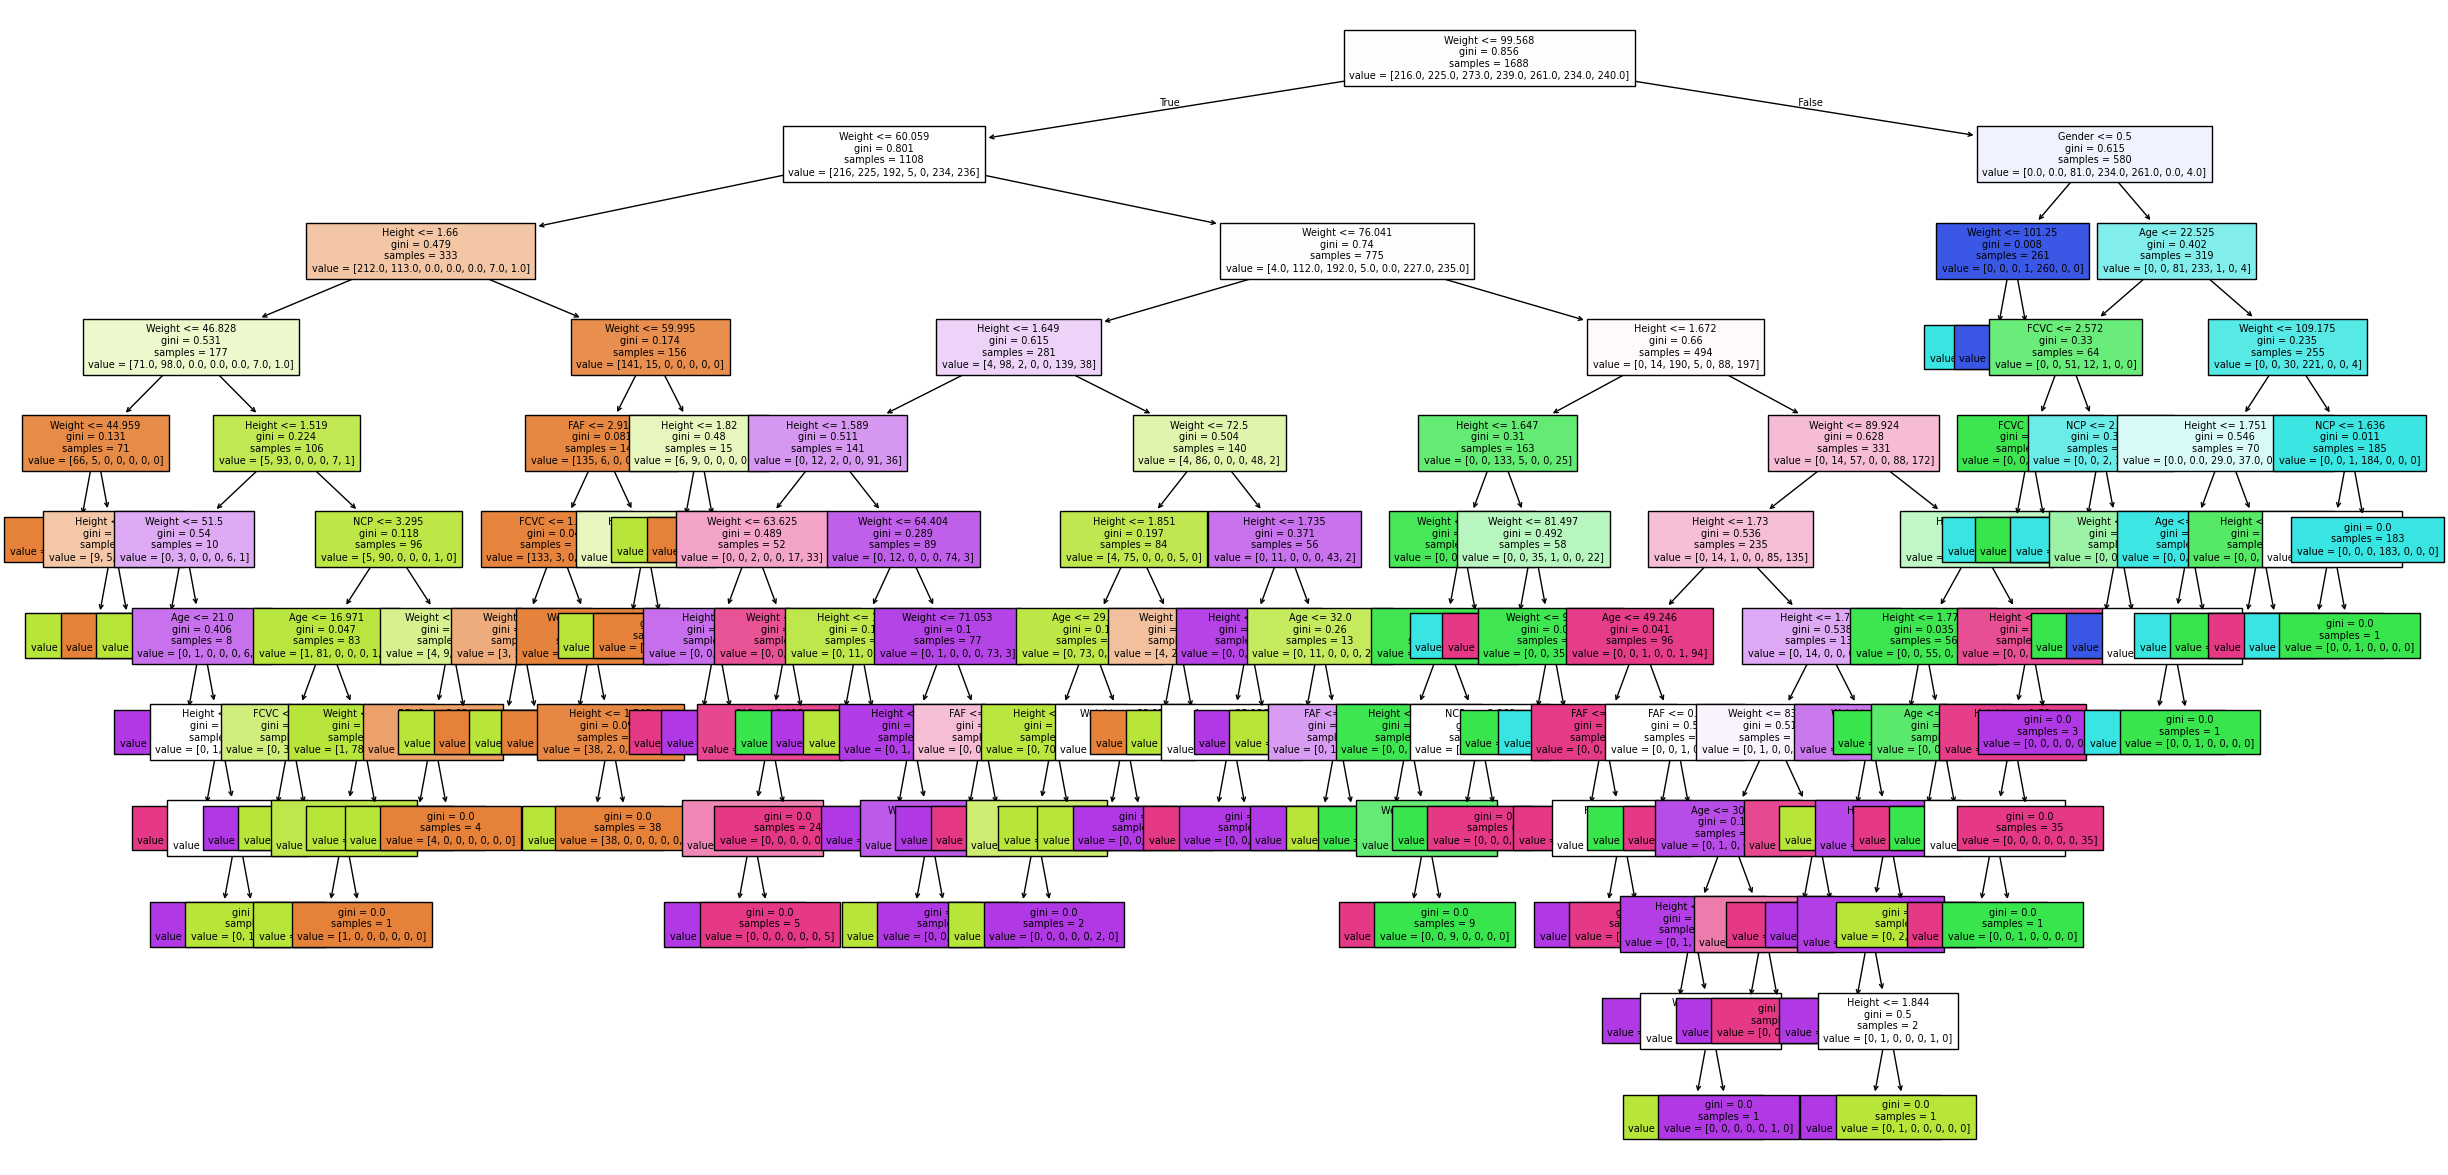

In [95]:
plt.figure(figsize=(30,15))
plot_tree(dt_classifier,filled=True,feature_names=X_train.columns,fontsize=7)
plt.show()

In [96]:
# comparing models
print("Decision Tree Classifier:-")
print("Accuracy:", accuracy_score(Y_test, dt_pred))
print(classification_report(Y_test, dt_pred))

Decision Tree Classifier:-
Accuracy: 0.9527186761229315
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.97        56
      Normal_Weight       0.98      0.90      0.94        62
     Obesity_Type_I       0.95      0.94      0.94        78
    Obesity_Type_II       0.96      0.95      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.92      0.96      0.94        56
Overweight_Level_II       0.92      0.92      0.92        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



In [97]:
print("Random Forest Classifier:-")
print("Accuracy:", accuracy_score(Y_test, rf_pred))
print(classification_report(Y_test, rf_pred))

Random Forest Classifier:-
Accuracy: 0.9692671394799054
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        56
      Normal_Weight       0.94      0.95      0.94        62
     Obesity_Type_I       0.97      0.99      0.98        78
    Obesity_Type_II       0.98      0.97      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.93      0.92        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423

